
# Predicting Customer Satisfaction on Rent the Runway

##  II. Data Cleaning for Garment Data 
### Katrin Ayrapetov


<font style="font-size: 2rem; color: blue">


 
</font>

### Overview of the Notebook: 

Data was scraped from the website Rent_the_Runway. There is a total of  208,747 observations. In the notebook, I_Data_Cleaning_Customer_Information, features describing the customer were cleaned. The new data set has 161,418 features. 

In this notebook, features describing the dress will be cleaned. 

**Features describing the customer:**  Nickname, Type_of_customer, Size of the garment customer rented, Size the customer usually wears, Height, Age, Bust Size, Body Type, Weight, Date the customer rented the garment, Reason the garment was rented, Overall fit of the garment  

**Features describing the dress:** Retail Price of the garment, Rent price of the garment, Product Details, Number of Reviews left for that Garment 

In this notebook, the features describing the dress will be cleaned.  
* The Retail price of the dress, the Rent price of dress, the number of reviews left for the dress will be stripped off extra symbols and just turned into an integer. 
* The product description will be broken up into three additional features: Sleeves, Neckline and Dress Style. 
* For example:
<br> &emsp;&emsp; **Product Detail:** 'Blue printed cotton (69% Cotton, 27% Nylon, 4% Spandex). Hourglass. Sleeveless. Square neckline. 45" from shoulder to hemline.' <br>
becomes 
<br> &emsp;&emsp; **New Features:** 
<br> &emsp;&emsp; **Sleeves:** Sleeveless, 
<br>&emsp;&emsp; **Neckline:** Square Neckline, 
<br>&emsp;&emsp; **Dress_Style:** Hourglass 
* At the end of the garment data cleaning, the data set has: 156,433 observations. 

In [1]:
#Import the libraries needed
import pandas as pd
import re
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
#Import the Data Set 
df =  pd.read_csv('../Data/df_customer_data_cleaned.csv')

In [3]:
#Create a checklist which will be used to make sure the cleaning is fone correctly. 
check_list=[1,45,200,1100,6565,7500]
check_list

[1, 45, 200, 1100, 6565, 7500]

In [5]:
#The number of Review features convert to just an integer
print(f"The data frame has {df.shape[0]} observations. There are {df.Number_of_reviews.isna().sum()} nulls for the Number_of_reviews feature. ")
for i in check_list:
    print(df["Number_of_reviews"][i])
#Get rid of unnecessary characters in some entries. 
df["Number_of_reviews"]=df["Number_of_reviews"].replace(" reviews","", regex=True).replace(" review","", regex=True)

for i in check_list:
    print(df["Number_of_reviews"][i])

df["Number_of_reviews"]=df["Number_of_reviews"].astype("int")


The data frame has 161418 observations. There are 0 nulls for the Number_of_reviews feature. 
33
97
118
64
9
62
33
97
118
64
9
62


In [6]:
#Drop the nulls in the Retail Price area. 
df.dropna(subset=['Retail_price'],inplace=True)
df = df.reset_index()
df.drop(columns=["index"],inplace=True)

In [7]:
#Convert the Retail Price feature to just an integer. 
print(f"The data frame has {df.shape[0]} observations. There are {df.Retail_price.isna().sum()} nulls for the Retail_price feature. ")
df.Retail_price.value_counts();
df["Retail_price"]=df["Retail_price"].replace(",","", regex=True)
#This is a test to make sure that the dollar amounts were converted correctly. 
for i in check_list:
    print(df["Retail_price"][i])
df["Retail_price"] = df["Retail_price"].str.extract(r"(\d+)",expand=True)
for i in check_list:
    print(df["Retail_price"][i])

df["Retail_price"]=df["Retail_price"].astype("int")

The data frame has 161329 observations. There are 0 nulls for the Retail_price feature. 
$478 original retail
$495 original retail
$230 original retail
$330 original retail
$317 original retail
$395 original retail
478
495
230
330
317
395


In [8]:
#Convert the Rental Price Feature to just an integer
print(f"The data frame has {df.shape[0]} observations. There are {df.Rent_price.isna().sum()} nulls for the Rent_price feature. ")
df["Rent_price"]=df["Rent_price"].replace(",","", regex=True)
#This is a test to make sure that the dollar amounts were converted correctly. 
for i in check_list:
    print(df["Rent_price"][i])
df["Rent_price"] = df["Rent_price"].str.extract(r"(\d+)",expand=True)
for i in check_list:
    print(df["Rent_price"][i])
df["Rent_price"]=df["Rent_price"].astype("int")

The data frame has 161329 observations. There are 0 nulls for the Rent_price feature. 
$70
$68 – $78
$32 – $42
$30 – $44
$32 – $42
$45 – $60
70
68
32
30
32
45


In [9]:
#Fix Typos in the Product Detail 
df["Product_details"]=df["Product_details"].replace("sleeve slit","", regex=True)
df["Product_details"]=df["Product_details"].replace("sleees","sleeves", regex=True)
df["Product_details"]=df["Product_details"].replace("sleves","sleeves", regex=True)
df["Product_details"]=df["Product_details"].replace("necline","neckline", regex=True)
df["Product_details"]=df["Product_details"].replace("slevees","sleeves", regex=True)


In [10]:
#Fill in values without product descriptions by hand. 
for i in range(df.shape[0]):
    if "Victor Alfaro Collective" in df["Brand"][i] and "Tea Length Shirtdress" in df["Dress_Description"][i]:
         df.at[i, "Product_details"] = "Shirtdress. three_quarter_sleeves. shirt_collar_neckline"
    if "Nicole Miller" in df["Brand"][i] and "Velvet Mini Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "sheath. high neckline. long sleeves"
    if "Adam Lippes Collective" in df["Brand"][i] and "Birds of Prey Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "hourglass.crew neckline. short sleeves"
    if "Area Stars" in df["Brand"][i] and "Lara Leopard Print Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "maxi.v-neckline. short sleeves"
    if "Tibi" in df["Brand"][i] and "Rolled Sleeve Shirtdress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "shirt dress. collared neckline.  short sleeves" 
    if "Jonathan Simkhai" in df["Brand"][i] and "Lucy Cutout Midi Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "sheath. straight neckling. sleeveless"   
    if "AllSaints" in df["Brand"][i] and "Juela Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "shift dress. mock neck. long sleeves."   
    if "AllSaints" in df["Brand"][i] and "Rosetta Tinsel Dress" in df["Dress_Description"][i]:       
        df.at[i, "Product_details"] = "maxi. crew neck. long sleeves."     


In [11]:
#The fabric content of the garment is given inside parenthesis ()
#Remove the text up to the first closed parentheses to get rid of the fabric content 
parentheses = df["Product_details"][0][54]
for i in range(df.shape[0]):
    df.at[i, "Product_details"] = df["Product_details"][i][df["Product_details"][i].find(parentheses):]
    df.at[i, "Product_details"]= df["Product_details"][i].lower()
df["Product_details"]=df["Product_details"].replace("\). ","", regex=True)
df["Product_details"]=df["Product_details"].replace("\) . ","", regex=True)
df["Product_details"]=df["Product_details"].replace("\) ","", regex=True)



In [12]:
#Break up the garment description into a list and call it "Details". 
#df["Details"][i][0] = style of garment 
#df["Details"][i][2] = style of sleeves
#df["Details"][i][3] = neckline 
#df["Details"][i][4] = length 
#df["Details"][i][5] = Imported or domestic
df["Details"] = "unknown" 
df["Details"] = df["Details"].astype('object')
for i in range(df.shape[0]):
    x = df["Product_details"][i].split(". ")
    df.at[i, 'Details'] = x

In [13]:
#These descriptions do not add to the features. Remove them from the List of descriptions. 
list_of_removal_words = ['fitted envelope skirt', 'low back', 'full pleated skirt',
       'open back with button closure', 'ruching waist',
       '\nlace detail at hem', 'fitted bodice with scalloped hemline',
       'sheer bodice', 'beaded waist', 'lined', 'full hi lo skirt',
       'open back', 'illusion with black and white overlay lace',
       'pencil skirt with ruching at waist',
       'pencil skirt with flounce ruffled hem',
       'straight skirt with mesh insert at waist',
       'pencil skirt with ruching detail', 'trumpet skirt',
       'ruched bodice with draping detail on back',
       'side and back cut out detail', 'draped back', 'straight', 'v-back',
       'buttons and hidden back zipper with hook-and-eye closure',
       'straight skirt with back slit', 'full hi-low skirt',
       'full floral skirt', 'back cut out', 'back zipper closure',
       'lace detail at hem', '33" from bust to hemline',
       'fitted tea length skirt',
       'straight skirt with side ruching and front slit',
       'combo (100% polyestercolumn', 'elastic waistband with drawstring',
       'top', 'lining: 100% polyester',
       'back zipper with hook-and-eye closure', 
       'hidden center back zipper closure', '36" from shoulder to hemline',
       'fit-and-flare', 'blouse', 'contrast, 100% wool',
       'exposed front button down placket', 'side zipper closure', 'pull-on',
       'center back zipper closure', 'high low hemline',
       'sequin coloration may vary', 'sewn on rosette details',
       'cutout at waist', 'off the shoulder', 'hidden side zipper',
       '\nhidden back zipper with hook-and-eye closure',
       'hidden center back zipper', 'back zipper',
       'step in and pull up in style', 'full tea length skirt',
       'full trumpet skirt with illusion detail', 'high low',
       'low back with cowl', 'exposed front button closures',
       '40" from shoulder to shortest hemline, 55" from shoulder to longest hemline',
       'tiered ruffle skirt with stripe detail',
       'column skirt with front slit and cut-out at waist',
       'v-back with hidden zipper.partially lined','45" from shoulder to hemline','35.5" from shoulder to hemline','made in the usa.', 'boned bodice', '40.5” from shoulder to hem.',
       'asymmetric hem', 'v- back',
       'hidden side zipper with hook-and-eye closure', 'hidden side zip',
       '35" from shoulder to hemline',
       'hidden zipper at center back on bodice and skirt',
       'visible back gold zipper', 'lace illusion', 'sequin bodice',
       '34.5" from shoulder to hemline', '42" from shoulder to hemline',
       'pockets', '', '33" from shoulder to hemline',
       'hidden zipper with hook-and-eye closure', '11.5" slit',
       '20.25" from shoulder to hemline', '58" from shoulder to hemline',
       'hidden side pockets', 'hook-and-eye closure',
       '35” from shoulder to hemline',
       '34” from shoulder to shortest part of hemline, 44” from shoulder to longest part of hemline',
       'column skirt', 'shoulder pads', '40” from shoulder to hem','40" from neckline to hemline','39" from neckline to hemline','48” from top of neckline to hem' ]

In [14]:
# If the following words are present in a description, remove them. 
for k in range(df.shape[0]):
    for i in range(len(df["Details"][k])):
        if str(df["Details"][k][i]) in list_of_removal_words: 
                df["Details"][k][i] = "drop"


In [15]:
#Clean the "Description" feature
for k in range(df.shape[0]):
    clean_list=[]
    for i in range(len(df["Details"][k])):
        if df["Details"][k][i] != "drop":
            clean_list.append(df["Details"][k][i])
    df.at[k, 'Details'] = clean_list


In [16]:
#This extracts the sleeve description from the item description. 
df["Sleeves"] = 1
df["Sleeves"] = df["Sleeves"].astype('object')
for i in range(df.shape[0]):
    for k in reversed(range(len(df["Details"][i]))):
        if "sleev" in df["Details"][i][k].lower() or "strapless" in df["Details"][i][k].lower() or "halter" in df["Details"][i][k].lower():
            df.at[i, "Sleeves"] = df["Details"][i][k].lower()
            

In [17]:
#Clean up the typos in the Sleeve Feature 
for i in range(df.shape[0]):
    if "sleeveless" in str(df["Sleeves"][i]) or "sleevleess" in str(df["Sleeves"][i]) or "sleevess" in str(df["Sleeves"][i]) or "sleevelss" in str(df["Sleeves"][i]) or "sleevless" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "sleeveless"
    elif "quarter" in str(df["Sleeves"][i]) or "3/4" in str(df["Sleeves"][i]) or "¾" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "three_quarter_sleeves"
    elif "short" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "short_sleeves"
    elif "long" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "long_sleeves"    
    elif "cap" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "cap_sleeves"   
    elif "flutter" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "flutter_sleeves"    
    elif "strapless" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "strapless"
    elif "elbow" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "elbow_length_sleeve"
    elif "halter" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "sleeveless"
    elif "off the shoulder neckline with ruffle detailing on sleeves" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "short_sleeves"   
    elif "three sleeves" in str(df["Sleeves"][i]):
        df.at[i, "Sleeves"] = "three_quarter_sleeves" 
    

In [18]:
#These are the most frequently occuring sleeve types. So, keep them in the list. 
list_of_sleeves = ['sleeveless',
 'long_sleeves',
 'short_sleeves',
 'three_quarter_sleeves',
 'cap_sleeves',
 'flutter_sleeves',
 'strapless'] 

In [19]:
for i in range(df.shape[0]):
    if str(df.at[i, "Sleeves"]) not in list_of_sleeves:
        df.at[i, "Sleeves"] = "other"

In [20]:
#Final break down of "Sleeves"
df.Sleeves.value_counts()

sleeveless               61680
long_sleeves             36886
short_sleeves            35681
three_quarter_sleeves    12284
cap_sleeves               6880
flutter_sleeves           3759
strapless                 3444
other                      715
Name: Sleeves, dtype: int64

In [21]:
#This extracts the Neckline description from the item description. 
df["Neckline"] = 1
df["Neckline"] = df["Neckline"].astype('object')
for i in range(df.shape[0]):
    for k in reversed(range(len(df["Details"][i]))):
        if "neck" in df["Details"][i][k].lower() or "shirt" in df["Details"][i][k].lower() or "strapless" in df["Details"][i][k].lower() or "collar" in df["Details"][i][k].lower() or "one shoulder" in df["Details"][i][k].lower() or "crew" in df["Details"][i][k].lower() or "sweetheart" in df["Details"][i][k].lower() or "scoop" in df["Details"][i][k].lower() or "off the shoulder" in df["Details"][i][k].lower():
            df.at[i, "Neckline"] = df["Details"][i][k]
            

In [22]:
#Clean up the typos and redundant naming in the Neckline Feature 
for i in range(df.shape[0]):
    if "v" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "v_neckline"
    elif "mock" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "mock_neckline"
    elif "halter" in str(df["Neckline"][i]) or "hater" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "halter"
    elif "high" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "high_neckline"
    elif "shoulder" in str(df["Neckline"][i]) or "shoudler" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "off_shoulder"
    elif "shirt" in str(df["Neckline"][i]) or "collar" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "shirt_collar_neckline"    
    elif "crew" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "crew_neckline"     
    elif "sweetheart" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "sweetheart"    
    elif "cowl" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "cowl_neckline"    
    elif "back" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "back_necktie" 
    elif "square" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "square_neckline" 
    elif "scoop" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "scoop_neckline" 
    elif "tie" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "tie_neckline" 
    elif "turtle" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "turtleneck"  
    elif "straight neckline" in str(df["Neckline"][i]) or "strapless" in str(df["Neckline"][i]):
        df.at[i, "Neckline"] = "straight_neckline" 
    elif "boat" in str(df["Neckline"][i]) :
        df.at[i, "Neckline"] = "boat_neckline" 

In [23]:
#These are the most frequently occuring neckline types. So, keep them in the list. 
list_of_necklines = ['v_neckline',
 'crew_neckline',
 'square_neckline',
 'high_neckline',
 'off_shoulder',
 'shirt_collar_neckline',
 'scoop_neckline',
 'sweetheart',
 'boat_neckline',
 'halter',
 'straight_neckline',
 'mock_neckline',
 'cowl_neckline',
 'turtleneck']

In [24]:
for i in range(df.shape[0]):
    if str(df.at[i, "Neckline"]) not in list_of_necklines:
        df.at[i, "Neckline"] = "other"

In [25]:
#Final break down of the necklines 
df.Neckline.value_counts()

v_neckline               54737
crew_neckline            40606
high_neckline            11256
square_neckline          10035
off_shoulder              9238
shirt_collar_neckline     6075
boat_neckline             5193
scoop_neckline            5103
sweetheart                5031
halter                    4611
straight_neckline         3593
mock_neckline             2691
other                     1347
cowl_neckline             1017
turtleneck                 796
Name: Neckline, dtype: int64

In [36]:
#This extracts the dress style description from the item description. 
df["Dress_Style"] = 1
df["Dress_Style"] = df["Dress_Style"].astype('object')
            
for i in range(df.shape[0]):
    if len(df["Details"][i])>0:
        df.at[i, "Dress_Style"] = df["Details"][i][0]

In [37]:
#Clean up the typos in the Dress Feature 
for i in range(df.shape[0]):
    if "hourglass" in str(df["Dress_Style"][i]) or "hpurglass" in str(df["Dress_Style"][i]) or "hourgless" in str(df["Dress_Style"][i]) or "houseglass" in str(df["Dress_Style"][i]) or "hourlgass" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "hourglass"
    elif "wrap" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "wrap"
    elif "maxi" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "maxi"
    elif "blouson" in str(df["Dress_Style"][i]) or "blosuon" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "blouson"  
    elif "shirtdress" in str(df["Dress_Style"][i]) or "shirt dress" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "shirtdress"   
    elif "sheath" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "sheath"   
    elif "a-line" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "a-line"  
    elif "empire" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "empire_waist"
    elif "gown" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "gown"    
    elif "shift" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "shift" 
    elif "slip" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "slip_dress"  
    elif "lining: 80% nylon, 20% spandex" in str(df["Dress_Style"][i]) or "three quarter sleeves" in str(df["Dress_Style"][i])  :
        df.at[i, "Dress_Style"] = "sheath"
    elif "short sleeves with cold shoulder detail" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "maxi"  
    elif "sleeveless with shirt collar" in str(df["Dress_Style"][i]) or "full skirt" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "full skirt" 
    elif "fitted skirt" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "fitted_skirt"
    elif "mermaid" in str(df["Dress_Style"][i]):
        df.at[i, "Dress_Style"] = "mermaid"   
    elif "shirt" in str(df["Dress_Style"][i]).lower():
        df.at[i, "Dress_Style"] = "shirtdress"
    elif "sweater" in str(df["Dress_Style"][i]).lower():
        df.at[i, "Dress_Style"] = "sweater_dress"
    elif "tunic" in str(df["Dress_Style"][i]).lower():
        df.at[i, "Dress_Style"] = "tunic_dress"


In [38]:
#These are the most frequently occuring dresstyle types. So, keep them in the list. 
list_of_dress_styles = ['hourglass','sheath','shift','gown','sleeveless','maxi','wrap','blouson','full skirt',
                        'short sleeves','a-line','long sleeves','empire_waist','cap sleeves','strapless','shirtdress']

In [39]:
for i in range(df.shape[0]):
    if str(df.at[i, "Dress_Style"]) not in list_of_dress_styles:
        df.at[i, "Dress_Style"] = "other"

In [ ]:
#This is the final breakdown of dress styles
df.Dress_Style.value_counts()

In [40]:
#Remove all the observations with unknown or seldomly occuring descriptors. 
df.drop(df[df['Dress_Style'] == "other"].index, inplace = True)
df.drop(df[df['Sleeves'] == "other"].index, inplace = True)
df.drop(df[df['Neckline'] == "other"].index, inplace = True)
df = df.reset_index()
df.drop(columns="index",inplace=True)

In [41]:
df2 = df.drop_duplicates(subset=["Brand", "Dress_Description"], keep='first', ignore_index=False)

In [42]:
df2.head()

,Type_of_Customer,Size,Overall_fit,Rented_for,Size_usually_worn,Height,Age,Bust_size,Body_type,Weight,Rating,Date,Brand,Dress_Description,Retail_price,Rent_price,Product_details,Number_of_reviews,BMI,Details,Sleeves,Neckline,Dress_Style
0,TOP CONTRIBUTOR,S,Overall fit: True to Size,Vacation,8,66,31,34C,athletic,142,5,spring,Tory Burch,Painted Roses Smocked Dress,478,70,"hourglass. sleeveless. square neckline. 45"" fr...",33,22.916896,"[hourglass, sleeveless, square neckline, impor...",sleeveless,square_neckline,hourglass
27,TOP CONTRIBUTOR,XS,Overall fit: Large,Vacation,4,63,39,32H,petite,125,4,spring,Tanya Taylor,Printed Claudia Dress,495,68,empire. sleeveless. scoop neckline. pockets. 4...,97,22.140338,"[empire, sleeveless, scoop neckline, 48"" from ...",sleeveless,scoop_neckline,empire_waist
56,TOP CONTRIBUTOR,2,Overall fit: True to Size,Everyday,6,63,31,36DD,hourglass,150,5,spring,Warm,Wax Poetic Garden Dress,350,60,"shift. long sleeves. crew neckline. 35.5"" from...",83,26.568405,"[shift, long sleeves, crew neckline, imported.]",long_sleeves,crew_neckline,shift
90,TOP CONTRIBUTOR,M,Overall fit: True to Size,Vacation,10,65,24,36DDD/E,hourglass,180,5,spring,FARM Rio,Macaw Mix Maxi,250,36,maxi. short sleeves. v-neckline. hidden side z...,142,29.950296,"[maxi, short sleeves, v-neckline, hidden side ...",short_sleeves,v_neckline,maxi
124,TOP CONTRIBUTOR,6,Overall fit: Large,Everyday,8,59,31,34C,petite,140,4,spring,Peter Som Collective,Chambray Midi Dress,395,33,shirt dress. short sleeve. shirt collar neckli...,59,28.273485,"[shirt dress, short sleeve, shirt collar neckl...",short_sleeves,shirt_collar_neckline,shirtdress


In [43]:
df2.Dress_Style.value_counts()

hourglass        2302
sheath           1661
shift             636
gown              351
sleeveless        331
maxi              325
wrap              251
blouson           129
full skirt        105
short sleeves      83
a-line             75
long sleeves       66
empire_waist       62
cap sleeves        48
strapless          34
shirtdress         31
Name: Dress_Style, dtype: int64

In [30]:
df2.Neckline.value_counts()

v_neckline               2331
crew_neckline            1615
square_neckline           448
high_neckline             413
off_shoulder              357
shirt_collar_neckline     294
scoop_neckline            244
sweetheart                212
boat_neckline             204
halter                    194
straight_neckline         140
mock_neckline             123
other                      69
cowl_neckline              44
turtleneck                 40
Name: Neckline, dtype: int64

In [29]:
df2.Sleeves.value_counts()

sleeveless               2550
long_sleeves             1558
short_sleeves            1533
three_quarter_sleeves     503
cap_sleeves               266
flutter_sleeves           145
strapless                 134
other                      39
Name: Sleeves, dtype: int64

In [31]:
#Get rid of the columns that do not need.
df.drop(columns=['Dress_Description',"Product_details","Details"],inplace=True)

In [32]:
df.shape

(156433, 20)

In [33]:
#Export as an excel file 
df.to_csv('../Data/df_clean.csv', header=True, index=False)

### Summary of this notebook: 

#### Before the cleaning of the garment feature data, this is an example of the observation: 
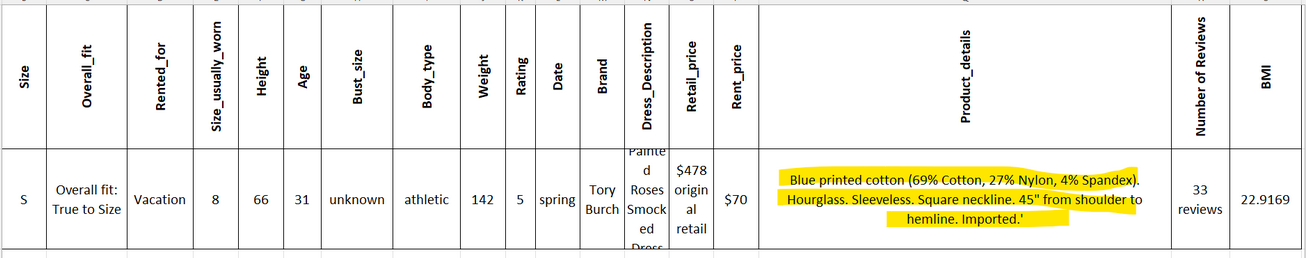
#### After the  cleaning of the garment feature data, this is an example of the observation: 
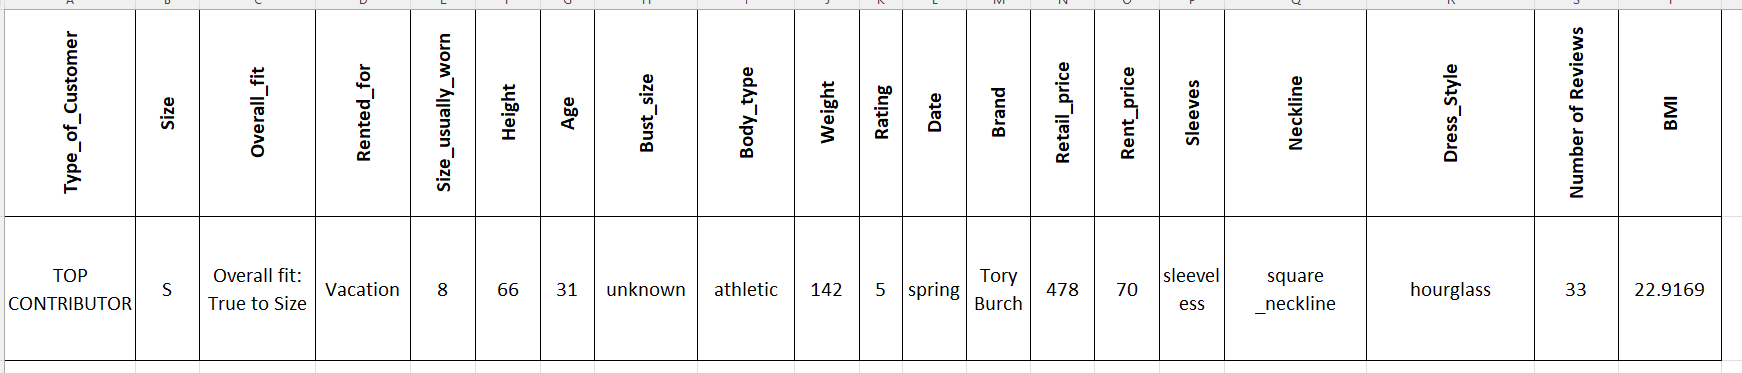


#### In the next notebook, EDA, some visualizations are presented to get a better idea of the feature distributions. 